In [1]:
import os
from PIL import Image

In [2]:
os.listdir()

['.ipynb_checkpoints', 'img.png', 'Untitled.ipynb']

Wczytujemy obrazek:

In [4]:
img = Image.open('img.png')

Zamieniamy go w macierz (x * y * rgb):

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img = np.array(img)

Wyświetlamy obrazek:

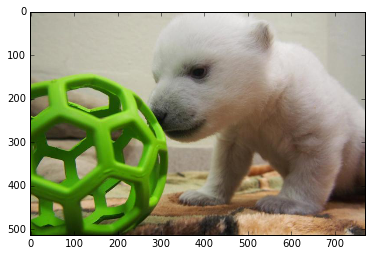

In [9]:
%matplotlib inline
plt.imshow(img)

Teraz zrobimy średnią z RGB i w ten sposób zamienimy obrazek na czarno-biały:

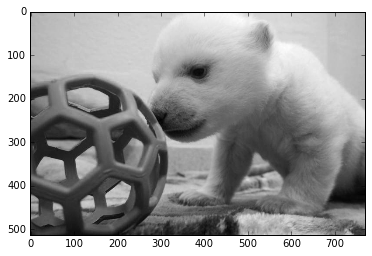

In [11]:
img_bw = img.mean(axis=2)
plt.imshow(img_bw, cmap='gray')

Chcemy przepleść ten obrazek z takim prostym filtrem do wykrywania krawędzi:

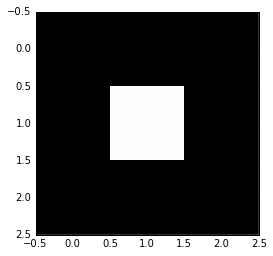

In [14]:
# tworzymy filtr
kern = np.array([[-1,-1,-1,],[-1, 8, -1], [-1,-1,-1]])
plt.imshow(kern, cmap='gray', interpolation='none')

In [15]:
from scipy.ndimage import convolve

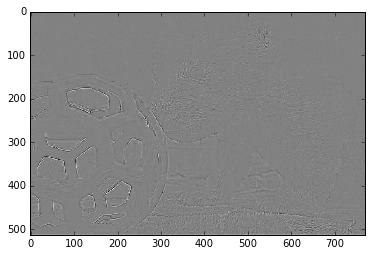

In [17]:
img_bw_flt = convolve(img_bw, kern)
plt.imshow(img_bw_flt, cmap='gray', interpolation='none')

Nie widać tego za dobrze, weźmiemy wycinek całości: oko misia jest w 100:200, 300:500

In [18]:
oko = img[100:200, 300:500, :]
oko_bw = img_bw[100:200, 300:500]
oko_bw_flt = img_bw_flt[100:200, 300:500]

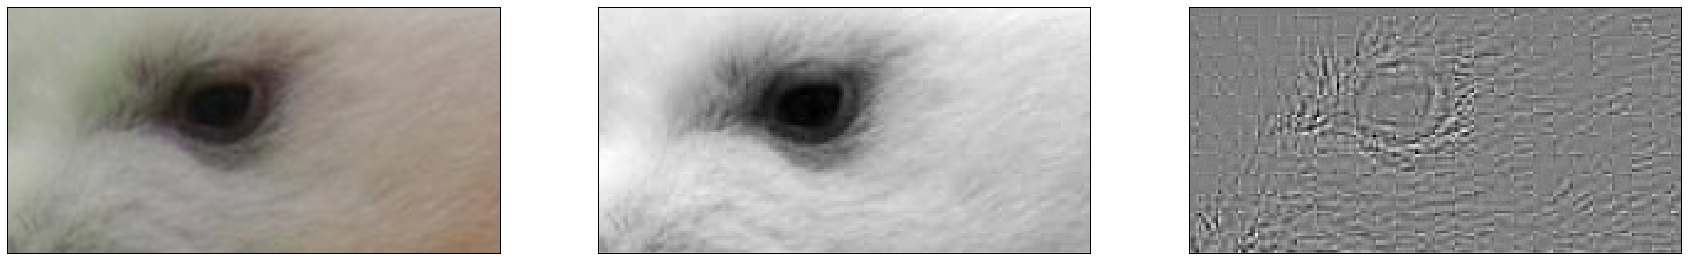

In [20]:
fig, ax = plt.subplots(ncols=3, figsize=(30,10))
ax[0].imshow(oko)
ax[1].imshow(oko_bw, cmap='gray', interpolation='none')
ax[2].imshow(oko_bw_flt, cmap='gray', interpolation='none')

# usuwamy znaczniki
for a in ax:
    a.set_xticks([])
    a.set_yticks([])

In [22]:
from skimage.filters import gabor_kernel

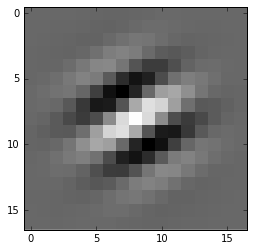

In [26]:
kern = np.real(gabor_kernel(0.2, theta=np.pi/3))
plt.imshow(kern, cmap='gray', interpolation='none')

In [27]:
oko_bw_flt = convolve(oko_bw, kern)

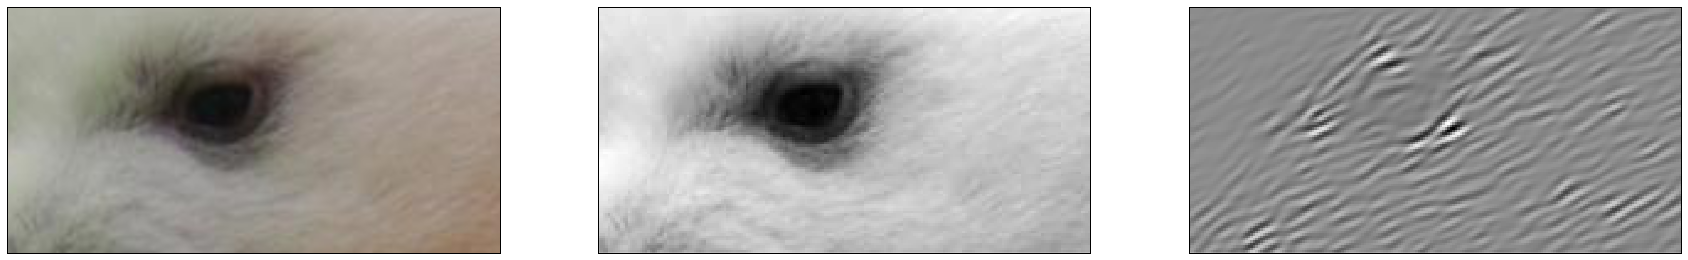

In [28]:
fig, ax = plt.subplots(ncols=3, figsize=(30,10))
ax[0].imshow(oko)
ax[1].imshow(oko_bw, cmap='gray', interpolation='none')
ax[2].imshow(oko_bw_flt, cmap='gray', interpolation='none')

# usuwamy znaczniki
for a in ax:
    a.set_xticks([])
    a.set_yticks([])